In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


# Load The Data 

In [2]:
data = pd.read_csv("../input/train.csv")

data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

## Seperating labels from original data

In [4]:
label = data['label']
final_data= data.drop('label', axis=1)

# Visualising data samples

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


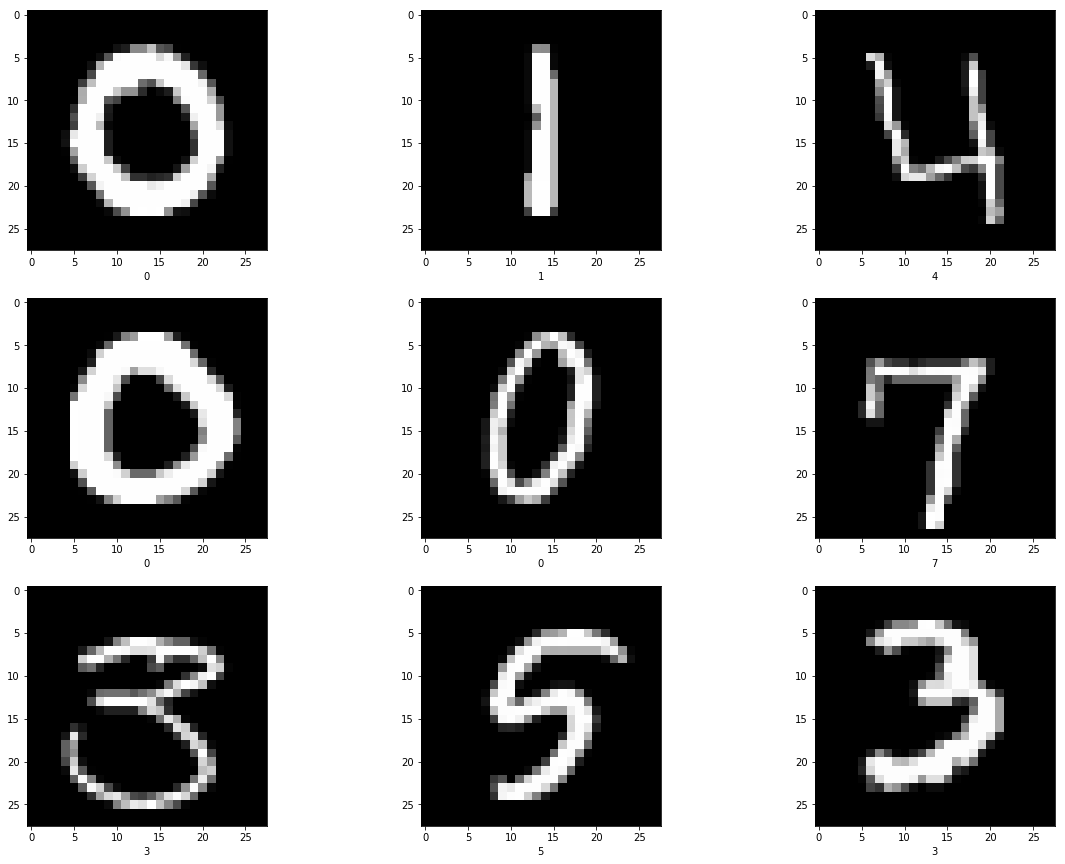

In [5]:
fig = plt.figure(figsize=(20,15))

for i in range(1,10,1):
    
    plt.subplot(3,3,i)
    image = final_data.iloc[i].as_matrix().reshape(28,28)
    plt.imshow(image, cmap='gray')  
    plt.xlabel(label[i])
plt.show()

# 2D visualisation of Data using PCA

*  First we will standardise the data.
*  Then compute the Co-Variance Matrix of the data
*  Then Compute Eigen values and Eigen Vectors
*  projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication.

In [6]:
# STEP-1
std_data = StandardScaler().fit_transform(final_data)
print(std_data.shape)

(42000, 784)


In [7]:
# STEP-2
CoVMat = np.matmul(std_data.T , std_data)
print(CoVMat.shape)

(784, 784)


In [8]:
# STEP-3
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(CoVMat , eigvals=(782,783)) 

print("The shape of Eigen Vectors", vectors.shape)

The shape of Eigen Vectors (784, 2)


In [9]:
#STEP-4
new_data = np.matmul(vectors.T , std_data.T)
print("The shape of new data", new_data.shape)

The shape of new data (2, 42000)


## Creating new dataframe from new coordinates 

In [10]:
stacking = np.vstack((new_data , label)).T
dataframe = pd.DataFrame(data=stacking , columns=("1st component", "2nd Component" , "Labels"))

dataframe.head(5)

,1st component,2nd Component,Labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


## Plotting the data

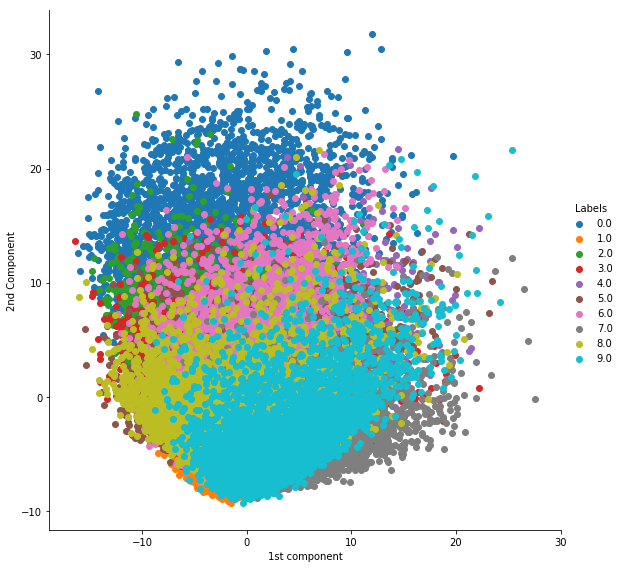

In [11]:
import seaborn as sns
sns.FacetGrid(dataframe , hue='Labels', height=8).map(plt.scatter, '1st component' , '2nd Component').add_legend()
plt.show()

# PCA using Scikit Learn

In [12]:
pca = PCA(n_components=2).fit_transform(std_data)
print("The shape of PCA reduced " ,pca.shape)

The shape of PCA reduced  (42000, 2)


In [13]:
stacking = np.vstack((pca.T , label)).T
dataframe = pd.DataFrame(data=stacking , columns=("1st component", "2nd Component" , "Labels"))
dataframe.head(5)

,1st component,2nd Component,Labels
0,-5.140430,-5.225809,1.0
1,19.292248,6.032120,0.0
2,-7.644557,-1.706543,1.0
3,-0.474228,5.835937,4.0
4,26.559501,6.024258,0.0


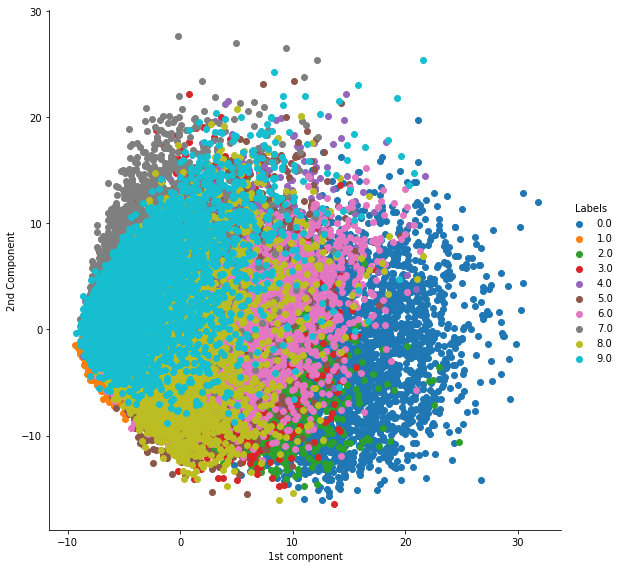

In [14]:
sns.FacetGrid(dataframe , hue='Labels', height=8).map(plt.scatter, '1st component' , '2nd Component').add_legend()
plt.show()

# PCA for dimensionality reduction (Not Visualisation)

In [15]:
pca = PCA(n_components=784).fit(std_data)
#print("The shape of PCA reduce", pca.shape)

(-39.150000000000006, 822.15, 0.0103535102692709, 1.0471260233205109)

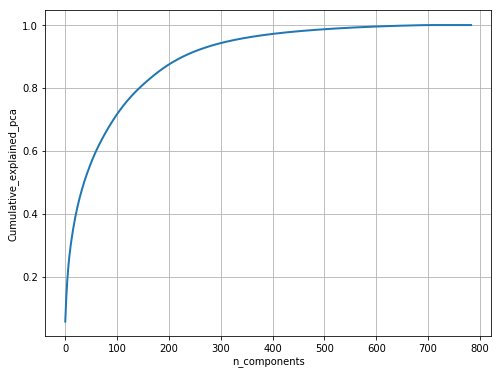

In [16]:
pca_variance = pca.explained_variance_ratio_
cumsum_var = np.cumsum(pca_variance)

plt.figure(figsize=(8,6))
plt.clf()
plt.plot(cumsum_var, linewidth=2)
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_pca')
plt.grid()
plt.axis('tight')
